In [1]:
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%run model.py
%run betweenCompare.py

%matplotlib inline

np.random.seed(1234)


# Functions 

# Load Data

In [2]:
# Load transformed data
cwd = os.getcwd()
datadir = cwd + os.sep + 'data' + os.sep

data = pd.read_csv(datadir + "complete_data.csv", index_col = 0)

In [3]:
data.head()

,favourites_count,followers_count,friends_count,listed_count,statuses_count,label,default_profile,default_profile_image,verified,arousal mean,...,valence 50%_mv,valence 75%_mv,valence max_mv,compound_mv_mv,neg_mv_mv,neu_mv_mv,pos_mv_mv,dominance_mv_mv,interarrival_mean_mv,interarrival_std_dev_mv
id,,,,,,,,,,,,,,,,,,,,,
3098421349,73,265,883,5,1594,1,True,False,False,-0.201691,...,0,0,0,0,0,0,0,0,0,0
554067867,2936,34,1689,18,5762,1,True,False,False,-0.152399,...,0,0,0,0,0,0,0,0,0,0
256597786,10,168,475,3,1184,1,True,False,False,-0.134114,...,0,0,0,0,0,0,0,0,0,0
103351486,55,181,147,4,6424,1,False,False,False,-0.182835,...,0,0,0,0,0,0,0,0,0,0
199973582,2,1503,1565,23,77207,1,True,False,False,-0.255669,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

In [4]:
# Train test split
X_train, X_test, y_train, y_test = ms.train_test_split(data.drop('label', 1), data.label, test_size=0.2, random_state=1001)

In [5]:
# DecisionTree for MI scores
dt = Model("Decision Tree", DecisionTreeClassifier(criterion='entropy'), X_train, y_train, X_test, y_test)

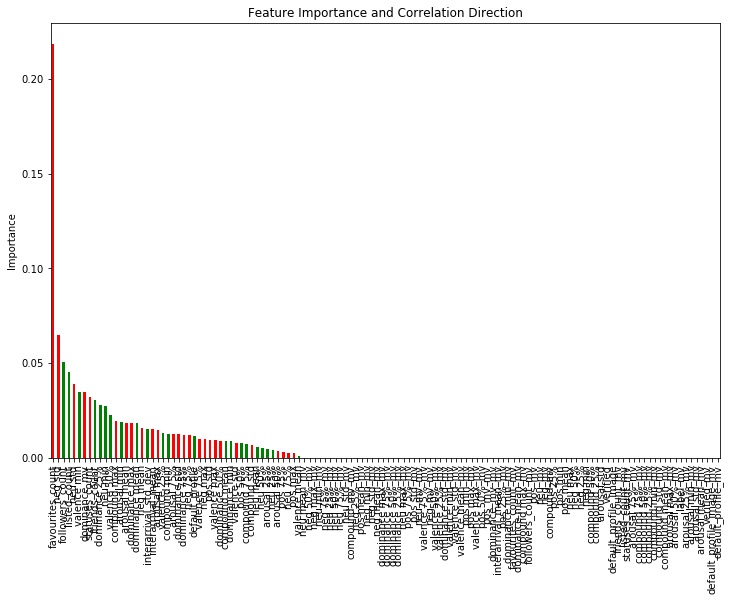

In [6]:
# Get importance and correlation
features_summary = pd.DataFrame(list(zip(X_train.columns, dt.models["Baseline"].model.feature_importances_)), 
                                columns=['feature','importance']).set_index('feature')
features_summary = features_summary.sort_values('importance', ascending=False)

corr_df = pd.DataFrame(data.corr()['label'][:-1])
corr_df.columns = ['correlation']

features_summary = features_summary.merge(corr_df, right_index=True, left_index=True)

# Plot importance and correlation
color_list = ['r' if corr < 0 else 'g' for corr in features_summary.correlation]
features_summary.importance.plot(kind='bar', color=color_list, figsize=(12,8))
plt.title('Feature Importance and Correlation Direction')
plt.ylabel('Importance')

# Select features
keep_features = features_summary[features_summary.importance > 0].index.values

# Train Baseline Model

In [7]:
# Discard features
X_train_filt = X_train[keep_features]
X_test_filt = X_test[keep_features]
print(keep_features)

['favourites_count' 'neg std' 'followers_count' 'listed_count' 'neu std'
 'valence min' 'dominance_mv' 'statuses_count' 'friends_count'
 'dominance 25%' 'neu min' 'valence 50%' 'compound max' 'arousal min'
 'arousal mean' 'dominance max' 'dominance mean' 'neg mean'
 'interarrival_std_dev' 'interarrival_mean' 'arousal max' 'valence 25%'
 'compound min' 'arousal 75%' 'dominance std' 'dominance 75%' 'neg 75%'
 'default_profile' 'valence 75%' 'neg max' 'pos std' 'valence max'
 'dominance 50%' 'compound mean' 'dominance min' 'valence std' 'pos 50%'
 'compound 75%' 'compound std' 'neu mean' 'neu 50%' 'arousal 25%' 'neu 25%'
 'arousal 50%' 'pos 75%' 'neu 75%' 'pos max' 'valence mean']


# Random Forest



In [8]:
rdf = Model("RDF", RandomForestClassifier(), X_train_filt, y_train, X_test_filt, y_test)

## Iteration 1

Best Score: 0.862184

Best Params:  {'estimator__n_estimators': 271}


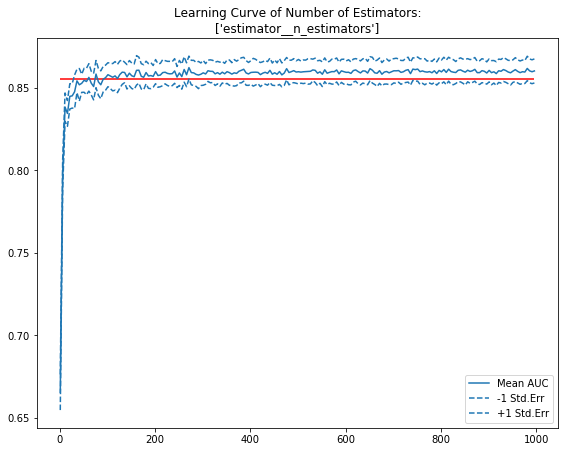

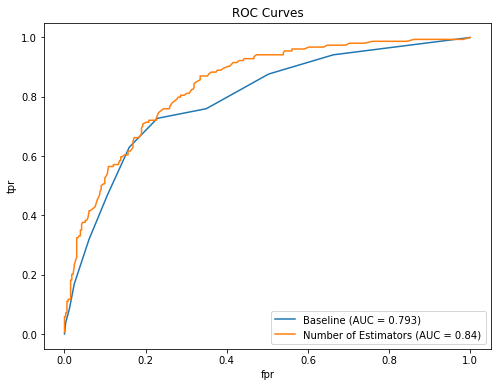

In [9]:
rdf.addIteration("Number of Estimators", RandomForestClassifier(),
                {'estimator__n_estimators': list(range(1,500,5))}, plot = True)
#                {'estimator__n_estimators': list(range(1,1000,5))}, plot = True)
rdf.withinCompare()

## Iteration 2

Best Score: 0.86103

Best Params:  {'estimator__max_features': 14}


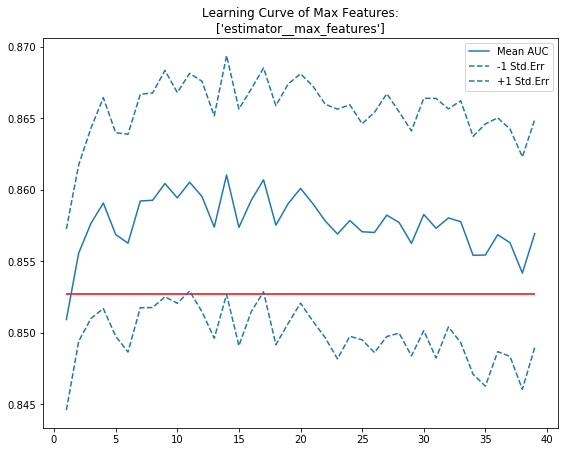

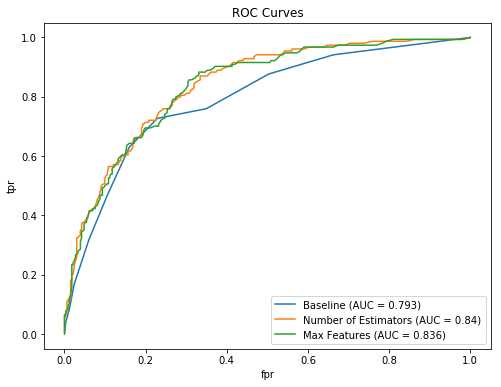

In [10]:
rdf.addIteration("Max Features", RandomForestClassifier(n_estimators=271),
                {'estimator__max_features': list(range(1,40,1))}, plot = True)
rdf.withinCompare()
#{'estimator__min_samples_leaf': list(range(2,20,2))}, plot = True)
#{'estimator__min_samples_split':list(range(2,10,1))}, plot = True)



## Iteration 3

Best Score: 0.863676

Best Params:  {'estimator__min_samples_leaf': 6}


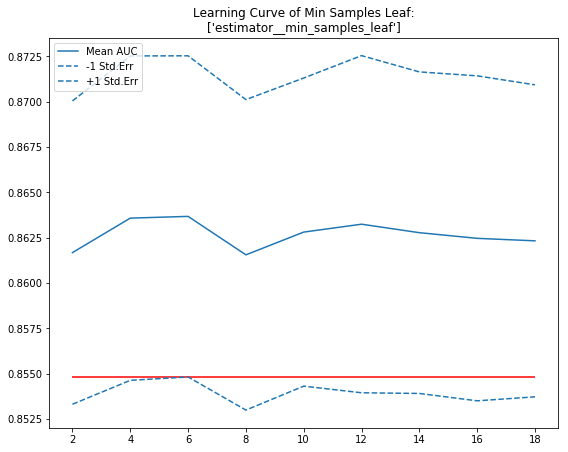

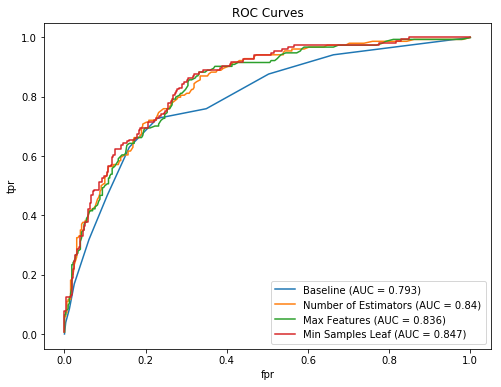

In [11]:
rdf.addIteration("Min Samples Leaf", RandomForestClassifier(n_estimators=291, max_features=14),
                {'estimator__min_samples_leaf': list(range(2,20,2))}, plot = True)
rdf.withinCompare()
#
#{'estimator__min_samples_split':list(range(2,10,1))}, plot = True)


## Iteration 4

Best Score: 0.863737

Best Params:  {'estimator__min_samples_split': 30}


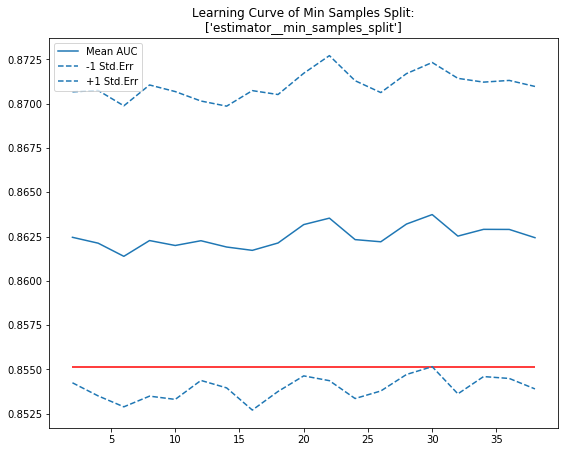

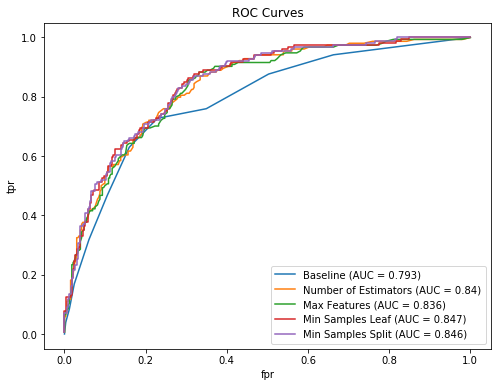

In [14]:
rdf.addIteration("Min Samples Split", RandomForestClassifier( n_estimators=291, max_features=14, min_samples_leaf=6),
                {'estimator__min_samples_split':list(range(2,40,2))}, plot = True)
rdf.withinCompare()


In [ ]:
## Iteration 5 (retry max_features)

Best Score: 0.863227

Best Params:  {'estimator__max_features': 9}


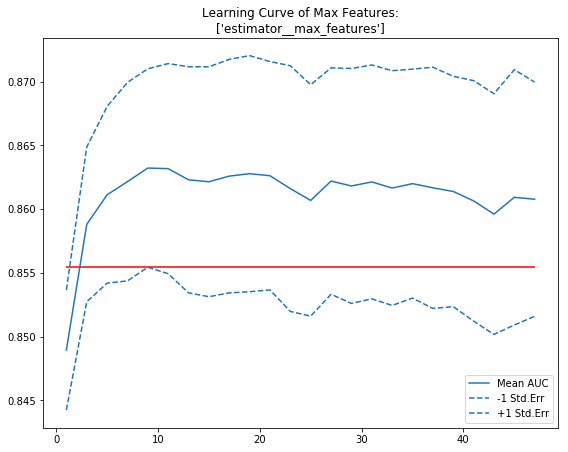

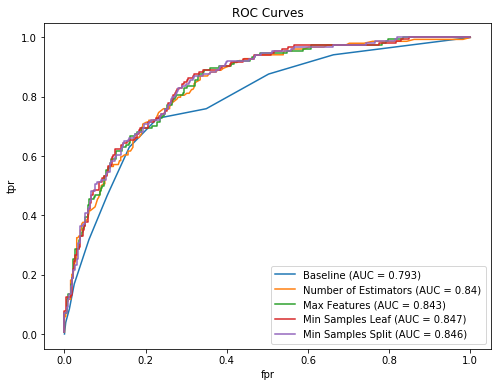

In [15]:
#max_features=14
rdf.addIteration("Max Features", RandomForestClassifier(  n_estimators=291,  min_samples_leaf=6, min_samples_split=22 ),
                {'estimator__max_features':list(range(1,49,2))}, plot = True)
rdf.withinCompare()

In [16]:
RandomForestClassifier(  n_estimators=291,  min_samples_leaf=6, min_samples_split=22, max_features=9 )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=9, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=22, min_weight_fraction_leaf=0.0,
            n_estimators=291, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)